# Arnab Chatterjee
# BONUS POINT ASSIGNMENT (FEATURE SELECTION)

In [9]:
!pip install scikit-learn

In [10]:
!pip install vecstack
!pip install mlxtend


In [1]:
from vecstack import stacking
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score #works
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE 
from sklearn.svm import SVC
from collections import Counter #for Smote, 

# Import libraries for feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS

import warnings
warnings.filterwarnings("ignore")


In [3]:
#Read files
trainfile = r'htrain.csv'
train_data = pd.read_csv(trainfile)

testfile = r'htest.csv'
test_data = pd.read_csv(testfile)

print(train_data.shape)
print(train_data.head()) 
print()
print(test_data.shape)
print(test_data.head()) 


(1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008  

In [5]:
# Identify relevant categorical features for one-hot encoding
categoricalFeatures = ["MSZoning", "Street", "LotShape", "LandContour", "SaleType"]  # Adjust based on your analysis

# Perform one-hot encoding on specified categorical features
train_data_encoded = pd.get_dummies(train_data, columns=categoricalFeatures)

# Check if the target variable is available
if 'SalePrice' in train_data_encoded.columns:
    # Separate features and target
    y_train = train_data_encoded["SalePrice"]
    X_train = train_data_encoded.drop("SalePrice", axis=1)
else:
    raise KeyError("Target variable 'SalePrice' not found in dataset.")

# Save processed dataset for future use
X_train.to_csv('X_train_AfterOneHotEncoding.csv', index=False)
y_train.to_csv('y_train.csv', index=False)

# Print shapes for verification
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (1460, 99)
y_train shape: (1460,)


In [14]:

# Separate features and target
target_column = "SalePrice"  # Replace with your actual target column name
if target_column in train_data.columns:
    y = train_data[target_column]
    X = train_data.drop(target_column, axis=1)
else:
    raise KeyError(f"Target column '{target_column}' not found in dataset.")

# Convert categorical features to numeric using one-hot encoding
X_encoded = pd.get_dummies(X)

# Split into training and test datasets (example 80/20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
# Construct the default decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
clf_predict = clf.predict(X_test)

# Metrics
print(f"Accuracy Score (Test): {clf.score(X_test, y_test):.6f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, clf_predict))
print("\nClassification Report:")
print(classification_report(y_test, clf_predict))

# Cross-validation scores
clf_cv_score = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print("\nCross-Validation Scores:")
print(clf_cv_score)
print(f"\nMean Accuracy Score (Cross-Validation): {clf_cv_score.mean():.6f}")

Accuracy Score (Test): 0.013699

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
              precision    recall  f1-score   support

       35311       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       55000       0.00      0.00      0.00         0
       55993       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         1
       64500       0.00      0.00      0.00         1
       66500       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         2
       68400       0.00      0.00      0.00         1
       68500       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       75500       0.00      0.00      0.00         1
       76000       0.00      0.00      0.00         0
       79000       0.00      0.00      0.00     

In [15]:
#Do feature selection using a classification model - DECISION TREE
print(clf.feature_importances_)

#print sorted list of important features
importances = clf.feature_importances_
indices = np.argsort(importances)[-10:] #the list is in ascending order
print("\n top 10 features = ", indices, "\n")


[0.04676462 0.00579666 0.02024525 0.02779592 0.01277102 0.01368703
 0.02634451 0.03026067 0.01605949 0.01891027 0.00610125 0.02947421
 0.02328295 0.03717447 0.01403003 0.00200442 0.03559308 0.00553602
 0.00171807 0.0017637  0.00415201 0.01102259 0.00085904 0.01371061
 0.01259219 0.01926317 0.00515422 0.02243968 0.01919533 0.02311745
 0.         0.00171977 0.00831123 0.         0.00257711 0.01793578
 0.02338643 0.         0.00114538 0.00257711 0.00171807 0.00278797
 0.00085904 0.         0.00085904 0.00085904 0.00997437 0.00085904
 0.         0.00755953 0.00171807 0.         0.00200442 0.00085904
 0.         0.         0.00454335 0.00515422 0.00085904 0.
 0.00587009 0.00171807 0.00379819 0.00085904 0.00085904 0.
 0.         0.         0.00085904 0.0041334  0.0015749  0.00085904
 0.00085904 0.         0.         0.00171807 0.00535456 0.
 0.00257711 0.00138212 0.00257711 0.00257711 0.00200442 0.00116906
 0.00291315 0.00171807 0.00085904 0.         0.         0.00085904
 0.00257711 0.00145

In [16]:
#Do feature selection using a classification model - DECISION TREE
#model = SelectFromModel(clf, prefit=True)
model = SelectFromModel(clf, prefit=True, max_features=10, threshold=-np.inf)
#model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_train)
X_new_SelectedFeatures= pd.DataFrame(X_new)
print(X_new_SelectedFeatures)
export_csv= X_new_SelectedFeatures.to_csv(r'X_new_SelectedFeatures.csv')



           0       1       2       3       4       5       6       7      8  \
0      255.0  8400.0  1957.0  1957.0   392.0  1314.0  1314.0  1314.0    0.0   
1     1067.0  7837.0  1993.0  1994.0   799.0   799.0   799.0  1571.0   40.0   
2      639.0  8777.0  1910.0  1950.0   796.0   796.0   796.0   796.0    0.0   
3      800.0  7200.0  1937.0  1950.0   162.0   731.0   981.0  1768.0    0.0   
4      381.0  5000.0  1924.0  1950.0   808.0  1026.0  1026.0  1691.0    0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...    ...   
1163  1096.0  9317.0  2006.0  2006.0  1290.0  1314.0  1314.0  1314.0   22.0   
1164  1131.0  7804.0  1928.0  1950.0   500.0  1122.0  1328.0  1981.0   44.0   
1165  1295.0  8172.0  1955.0  1990.0   697.0   864.0   864.0   864.0    0.0   
1166   861.0  7642.0  1918.0  1998.0   912.0   912.0   912.0  1426.0  240.0   
1167  1127.0  3684.0  2007.0  2007.0  1373.0  1373.0  1555.0  1555.0   20.0   

           9  
0     2010.0  
1     2009.0  
2     

In [17]:
#Do feature selection using a classification model - DECISION TREE
#Get column names
print(model.get_support())

#Get column names
cols = model.get_support(indices=True) #get column indices
print("\n cols = ", cols, "\n")

features_df_new = X_train.iloc[:,cols] #Get cols of X-Train with col names
print(features_df_new.shape)
print ("\n features_df_new= ", features_df_new)
#print(features_df_new.head())

#save file
export_csv= features_df_new.to_csv(r'features_df_new.csv')


[ True False False  True False False  True  True False False False  True
  True  True False False  True False False False False False False False
 False False False False False  True False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [19]:
#CONSTRUCT DEFAULT DECISION TREE - WITH FEATURE SELECTION - AND OBTAIN RESPECTIVE ACCURACY 
clf = DecisionTreeClassifier()
clf.fit(features_df_new, y_train)
#Get corresponding test set columns
features_df_new_test = X_test.iloc[:,cols] #Get cols of X-Train with col names
print(features_df_new_test.shape)

clf_predict=clf.predict(features_df_new_test)
#Obtain accuracy ,confusion matrix,classification report and AUC values for the result above.
print("accuracy Score (training) for Decision TreE:{0:6f}".format(clf.score(features_df_new_test,y_test)))
print("Confusion Matrix for Decision Tree")
print(confusion_matrix(y_test,clf_predict))

print("=== Classification Report ===")
print(classification_report(y_test,clf_predict))
#clf_cv_score = cross_val_score(clf, X_train, y_train, cv=10, scoring="roc_auc")
clf_cv_score = cross_val_score(clf, features_df_new, y_train, cv=10, scoring="accuracy")
print("=== All Accuracy Scores ===")
print(clf_cv_score)
print('\n')
print("=== Mean Accuracy Score ===")
print("Mean Accuracy Score - Decision Tree: ",clf_cv_score.mean())


(292, 10)
accuracy Score (training) for Decision TreE:0.006849
Confusion Matrix for Decision Tree
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
=== Classification Report ===
              precision    recall  f1-score   support

       35311       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       55000       0.00      0.00      0.00         0
       55993       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         1
       64500       0.00      0.00      0.00         1
       66500       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         2
       68400       0.00      0.00      0.00         1
       68500       0.00      0.00      0.00         1
       73000       0.00      0.00      0.00         0
       75000       0.00      0.00      0.00         1
       75500       0.00      0.00      0.00      

In [29]:
#RANDOM FOREST=================================================================================================
#===============================================================================================================
#CONSTRUCT DEFAULT DECISION TREE WITHOUT FEATURE SELECTION AND OBTAIN RESPECTIVE ACCURACY 
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predict=rfc.predict(X_test)
#Obtain accuracy ,confusion matrix,classification report and AUC values for the result above.
print("accuracy Score (training) for Random Forest:{0:6f}".format(rfc.score(X_test,y_test)))
print("Confusion Matrix for Random Fores")
print(confusion_matrix(y_test,rfc_predict))

print("=== Classification Report ===")
print(classification_report(y_test,rfc_predict))
#clf_cv_score = cross_val_score(clf, X_train, y_train, cv=10, scoring="roc_auc")
rfc_cv_score = cross_val_score(rfc, X_train, y_train, cv=10, scoring="accuracy")
print("=== All Accuracy Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean Accuracy Score ===")
print("Mean Accuracy Score - Random Fores: ",rfc_cv_score.mean())


accuracy Score (training) for Random Forest:0.003425
Confusion Matrix for Random Fores
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
=== Classification Report ===
              precision    recall  f1-score   support

       34900       0.00      0.00      0.00         0
       35311       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       55000       0.00      0.00      0.00         0
       55993       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         1
       61000       0.00      0.00      0.00         0
       64500       0.00      0.00      0.00         1
       66500       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         2
       68400       0.00      0.00      0.00         1
       68500       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
      

In [30]:
#RANDOM FOREST=================================================================================================
#Do feature selection using a classification model - RANDOM FOREST
print(rfc.feature_importances_)

#print sorted list of important features
importances = rfc.feature_importances_
indices = np.argsort(importances)[-10:] #the list is in ascending order
print("\n top 10 features = ", indices, "\n")


[2.75769270e-02 1.06345113e-02 2.38653801e-02 2.58459257e-02
 1.36794902e-02 1.12574231e-02 2.21431227e-02 2.05382824e-02
 1.67253638e-02 2.07995425e-02 5.58354984e-03 2.53292179e-02
 2.56300842e-02 2.56526724e-02 1.48553768e-02 1.41945103e-03
 2.60812893e-02 8.33080164e-03 2.81098452e-03 5.39010196e-03
 6.12363952e-03 1.06505083e-02 1.33274518e-03 1.56012569e-02
 9.07344657e-03 2.24384441e-02 7.95405991e-03 2.52813307e-02
 1.68097853e-02 1.81944991e-02 6.96079216e-03 2.23530743e-03
 5.80970535e-03 3.88951934e-04 2.68128809e-03 2.13842505e-02
 1.67716623e-02 3.50002685e-04 1.43076403e-03 9.56981908e-04
 3.92116996e-03 2.92948085e-03 2.48978184e-04 3.51750678e-04
 1.24869780e-03 1.34753108e-03 6.85512122e-03 1.98182059e-03
 8.20988631e-04 6.42224504e-03 1.76378408e-03 1.72113488e-03
 1.11085457e-03 2.74205135e-03 8.38907810e-05 7.25886338e-05
 5.26323479e-03 3.15699010e-03 2.23945279e-03 5.08366972e-04
 6.41003745e-03 1.99534264e-03 1.72747463e-03 5.62347011e-04
 7.93579508e-04 1.271833

In [31]:
#Do feature selection using a classification model - RANDOM FOREST
#model = SelectFromModel(clf, prefit=True)
model = SelectFromModel(rfc, prefit=True, max_features=10, threshold=-np.inf)
#model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_train)
X_new_SelectedFeatures_RF= pd.DataFrame(X_new)
print(X_new_SelectedFeatures_RF)
export_csv= X_new_SelectedFeatures_RF.to_csv(r'X_new_SelectedFeatures_RF.csv')


           0     1       2       3       4       5       6       7       8  \
0      255.0  70.0  8400.0  1957.0   392.0  1314.0  1314.0  1314.0  1957.0   
1     1067.0  59.0  7837.0  1993.0   799.0   799.0   799.0  1571.0  1993.0   
2      639.0  67.0  8777.0  1910.0   796.0   796.0   796.0   796.0     NaN   
3      800.0  60.0  7200.0  1937.0   162.0   731.0   981.0  1768.0  1939.0   
4      381.0  50.0  5000.0  1924.0   808.0  1026.0  1026.0  1691.0  1924.0   
...      ...   ...     ...     ...     ...     ...     ...     ...     ...   
1163  1096.0  78.0  9317.0  2006.0  1290.0  1314.0  1314.0  1314.0  2006.0   
1164  1131.0  65.0  7804.0  1928.0   500.0  1122.0  1328.0  1981.0  1981.0   
1165  1295.0  60.0  8172.0  1955.0   697.0   864.0   864.0   864.0  1957.0   
1166   861.0  55.0  7642.0  1918.0   912.0   912.0   912.0  1426.0  1925.0   
1167  1127.0  53.0  3684.0  2007.0  1373.0  1373.0  1555.0  1555.0  2007.0   

          9  
0     294.0  
1     380.0  
2       0.0  
3     2

In [32]:
#Do feature selection using a classification model - RANDOM FOREST
#Get column names
print(model.get_support())

#Get column names
cols = model.get_support(indices=True) #get column indices
print("\n cols = ", cols, "\n")

features_df_new_RF = X_train.iloc[:,cols] #Get cols of X-Train with col names
print(features_df_new_RF.shape)
print ("\n features_df_new= ", features_df_new_RF)
#print(features_df_new.head())

#save file
export_csv= features_df_new_RF.to_csv(r'features_df_new_RF.csv')


[ True False  True  True False False  True False False False False  True
  True  True False False  True False False False False False False False
 False  True False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [33]:
#CONSTRUCT DEFAULT RANDOM FOREST - WITH FEATURE SELECTION - AND OBTAIN RESPECTIVE ACCURACY 
rfc = RandomForestClassifier()
rfc.fit(features_df_new_RF, y_train)
#Get corresponding test set columns
features_df_new_test_RF = X_test.iloc[:,cols] #Get cols of X-Train with col names
print(features_df_new_test_RF.shape)

rfc_predict=rfc.predict(features_df_new_test_RF)
#Obtain accuracy ,confusion matrix,classification report and AUC values for the result above.
print("accuracy Score (training) for Random Forest:{0:6f}".format(rfc.score(features_df_new_test_RF,y_test)))
print("Confusion Matrix for Random Forest")
print(confusion_matrix(y_test,rfc_predict))

print("=== Classification Report ===")
print(classification_report(y_test,rfc_predict))
#clf_cv_score = cross_val_score(rfc, X_train, y_train, cv=10, scoring="roc_auc")
clf_cv_score = cross_val_score(rfc, features_df_new_RF, y_train, cv=10, scoring="accuracy")
print("=== All Accuracy Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean Accuracy Score ===")
print("Mean Accuracy Score - Random Forest: ",rfc_cv_score.mean())


(292, 10)
accuracy Score (training) for Random Forest:0.027397
Confusion Matrix for Random Forest
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
=== Classification Report ===
              precision    recall  f1-score   support

       35311       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       55993       0.00      0.00      0.00         1
       58500       0.00      0.00      0.00         0
       60000       0.00      0.00      0.00         1
       64500       0.00      0.00      0.00         1
       66500       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         2
       68400       0.00      0.00      0.00         1
       68500       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       75500       0.00      0.00      0.00         1
       78000       0.00      0.00      0.00      

In [34]:
#Sequential FORWARD Search =====================================================================
#===========================================================================================================
#http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

#!pip install mlxtend
!pip install clodsa==1.2.43
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

clf = DecisionTreeClassifier()

sfs1 = SFS(clf, 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=3)

sfs1 = sfs1.fit(X_train,y_train)
sfs1.subsets_



[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    1.4s

[2024-11-26 19:32:24] Features: 1/10 -- score: 0.018834179245490298[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    1.5s

[2024-11-26 19:32:26] Features: 2/10 -- score: 0.022255179838727396[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    1.5s

[2024-11-26 19:32:29] Features: 3/10 -- score: 0.026533078461099025[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.2s

[2024-11-26 19:32:32] Features: 4/10 -- score: 0.029958473403203484[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    1.8s

[2024-11-26 19:32:35] Features: 5/10 -- score: 0.03423856920000879[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed

{1: {'feature_idx': (19,),
  'cv_scores': array([0.02051282, 0.02056555, 0.01542416]),
  'avg_score': 0.018834179245490298,
  'feature_names': ('FullBath',)},
 2: {'feature_idx': (19, 248),
  'cv_scores': array([0.02820513, 0.02313625, 0.01542416]),
  'avg_score': 0.022255179838727396,
  'feature_names': ('FullBath', 'GarageFinish_Unf')},
 3: {'feature_idx': (19, 145, 248),
  'cv_scores': array([0.03589744, 0.02313625, 0.02056555]),
  'avg_score': 0.026533078461099025,
  'feature_names': ('FullBath', 'Exterior1st_VinylSd', 'GarageFinish_Unf')},
 4: {'feature_idx': (19, 118, 145, 248),
  'cv_scores': array([0.03846154, 0.02827763, 0.02313625]),
  'avg_score': 0.029958473403203484,
  'feature_names': ('FullBath',
   'HouseStyle_SLvl',
   'Exterior1st_VinylSd',
   'GarageFinish_Unf')},
 5: {'feature_idx': (19, 87, 118, 145, 248),
  'cv_scores': array([0.04358974, 0.03598972, 0.02313625]),
  'avg_score': 0.03423856920000879,
  'feature_names': ('FullBath',
   'Neighborhood_Timber',
   'Hou

Selected feature indices: (19, 77, 87, 118, 144, 145, 179, 236, 248, 285)
Selected feature names: ['FullBath', 'Neighborhood_NPkVill', 'Neighborhood_Timber', 'HouseStyle_SLvl', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Foundation_Slab', 'FireplaceQu_Fa', 'GarageFinish_Unf', 'SaleCondition_Family']
Model accuracy on test set: 0.003424657534246575


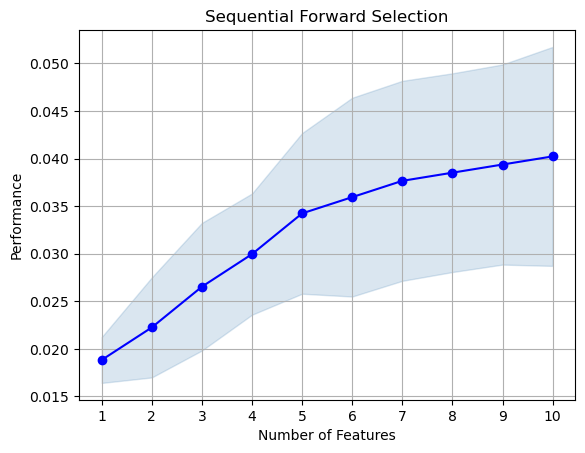

In [39]:
# Get indices of selected features
selected_feature_indices = sfs1.k_feature_idx_
print("Selected feature indices:", selected_feature_indices)

# If the dataset has column names
selected_feature_names = [X_train.columns[i] for i in selected_feature_indices]
print("Selected feature names:", selected_feature_names)

X_train_sfs = X_train.iloc[:, list(selected_feature_indices)]
X_test_sfs = X_test.iloc[:, list(selected_feature_indices)]

# Train model with selected features
clf.fit(X_train_sfs, y_train)
print("Model accuracy on test set:", clf.score(X_test_sfs, y_test))

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()


In [43]:
#Sequential forward search result
print(sfs1.k_feature_names_)
print(sfs1.k_score_)


('FullBath', 'Neighborhood_NPkVill', 'Neighborhood_Timber', 'HouseStyle_SLvl', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Foundation_Slab', 'FireplaceQu_Fa', 'GarageFinish_Unf', 'SaleCondition_Family')
0.04022806670621581


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 member

Selected features: ('0', '3', '12', '14', '15', '19', '26', '28', '32', '37')
Subsets and scores: {50: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49), 'cv_scores': array([0.00769231, 0.00771208, 0.00514139]), 'avg_score': 0.006848592709775229, 'feature_names': ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49')}, 49: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49), 'cv_scores': array([0.01025641, 0.01799486, 0.01285347]), 'avg_score': 0.0137


[2024-11-26 22:08:09] Features: 10/10 -- score: 0.015408784303385846

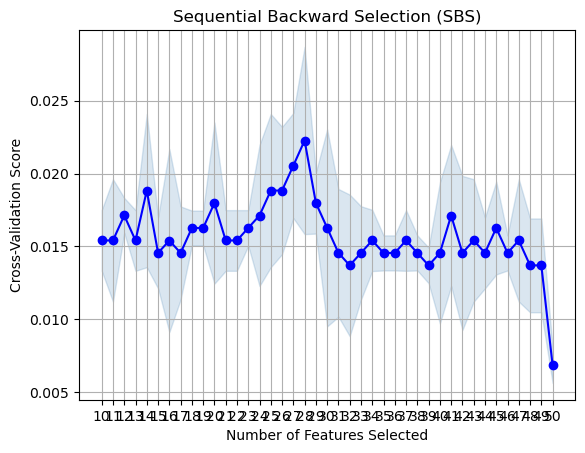

In [156]:
#Sequential BACKWARD Search =====================================================================
#===========================================================================================================9=[

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = 'htrain.csv'
data = pd.read_csv(file_path)

# Separate features and target
target_column = "SalePrice"  # Replace with your actual target column name
if target_column in data.columns:
    y = data[target_column]
    X = data.drop(target_column, axis=1)
else:
    raise KeyError(f"Target column '{target_column}' not found in dataset.")

# Convert categorical features to numeric using one-hot encoding
X_encoded = pd.get_dummies(X)

# Handle missing values by imputing
imputer = SimpleImputer(strategy="mean")  # Replace NaN values with column mean
X_encoded_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_imputed, y, test_size=0.2, random_state=42)

# Use SelectKBest to reduce the feature space (e.g., to top 50 features)
selector = SelectKBest(chi2, k=50)
X_train_reduced = selector.fit_transform(X_train, y_train)

# Perform Sequential Backward Selection
clf = DecisionTreeClassifier()

sbs = SFS(clf, 
          k_features=10,  # Reduce to 10 features
          forward=False, 
          floating=False, 
          verbose=2,
          scoring='accuracy',
          cv=3,
          n_jobs=-1)  # Use all available cores

# Fit the SBS model
sbs = sbs.fit(X_train_reduced, y_train)

# Print the selected features
print("Selected features:", sbs.k_feature_names_)
print("Subsets and scores:", sbs.subsets_)

# Sequential backward search result
print("Selected feature names (SBS):", sbs.k_feature_names_)
print("Best cross-validation score (SBS):", sbs.k_score_)

# Plot the feature selection process
fig = plot_sfs(sbs.get_metric_dict(), kind='std_dev')

# Enhance plot appearance
plt.title('Sequential Backward Selection (SBS)')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validation Score')
plt.grid()
plt.show()

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import pandas as pd

# Load dataset
file_path = 'htrain.csv'
data = pd.read_csv(file_path)

# Separate features and target
target_column = "SalePrice"  # Replace with your actual target column name
if target_column in data.columns:
    y = data[target_column]
    X = data.drop(target_column, axis=1)
else:
    raise KeyError(f"Target column '{target_column}' not found in dataset.")

# Convert categorical features to numeric using one-hot encoding
X_encoded = pd.get_dummies(X)

# Handle missing values by imputing
imputer = SimpleImputer(strategy="mean")  # Replace NaN values with column mean
X_encoded_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Split into training and test datasets
X_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,255.0,20.0,70.0,8400.0,5.0,6.0,1957.0,1957.0,0.0,922.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1066,1067.0,60.0,59.0,7837.0,6.0,7.0,1993.0,1994.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
638,639.0,30.0,67.0,8777.0,5.0,7.0,1910.0,1950.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
799,800.0,50.0,60.0,7200.0,5.0,7.0,1937.0,1950.0,252.0,569.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
380,381.0,50.0,50.0,5000.0,5.0,6.0,1924.0,1950.0,0.0,218.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096.0,20.0,78.0,9317.0,6.0,5.0,2006.0,2006.0,0.0,24.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1130,1131.0,50.0,65.0,7804.0,4.0,3.0,1928.0,1950.0,0.0,622.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1294,1295.0,20.0,60.0,8172.0,5.0,7.0,1955.0,1990.0,0.0,167.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
860,861.0,50.0,55.0,7642.0,7.0,8.0,1918.0,1998.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
!pip install sklearn-genetic

In [13]:
from sklearn.tree import DecisionTreeClassifier
from genetic_selection import GeneticSelectionCV
from sklearn.impute import SimpleImputer
import pandas as pd

# Load dataset
file_path = 'htrain.csv'
data = pd.read_csv(file_path)

# Separate features and target
target_column = "SalePrice"  # Replace with actual target column name
if target_column in data.columns:
    y = data[target_column]
    X = data.drop(target_column, axis=1)
else:
    raise KeyError(f"Target column '{target_column}' not found in dataset.")

# Convert categorical features to numeric using one-hot encoding
X_encoded = pd.get_dummies(X)

# Handle missing values by imputing
imputer = SimpleImputer(strategy="mean")  # Replace NaN values with column mean
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Prepare data for GeneticSelectionCV
x = X_imputed.values  # Convert to numpy array
y = y.values  # Ensure target is a numpy array

# Initialize the classifier
clf = DecisionTreeClassifier()

# Apply Genetic Algorithm for Feature Selection
model = GeneticSelectionCV(
    clf, 
    cv=5, 
    verbose=1, 
    scoring="accuracy", 
    max_features=10, 
    n_population=100, 
    crossover_proba=0.5, 
    mutation_proba=0.2, 
    n_generations=100, 
    crossover_independent_proba=0.5, 
    mutation_independent_proba=0.04, 
    tournament_size=3, 
    n_gen_no_change=10, 
    caching=True, 
    n_jobs=-1
)

# Fit the model
model = model.fit(x, y)

# Output selected features
print("Selected features:")
print(X_imputed.columns[model.support_])

Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min          	max                               
0  	100   	[ 0.009582  5.87      0.002783]	[ 0.004127  2.722701  0.001439]	[ 0.  1.  0.]	[  0.018493  10.         0.006498]
1  	55    	[-1699.989719     6.6       1700.002107]	[ 3756.332647     4.690416  3756.327041]	[-10000.      1.      0.]	[     0.018493     25.        10000.      ]
2  	67    	[-1699.988568     6.44      1700.002148]	[ 3756.333168     5.284543  3756.327022]	[-10000.      1.      0.]	[     0.019178     22.        10000.      ]
3  	51    	[-1399.987158     5.94      1400.002418]	[ 3469.875496     4.566881  3469.869339]	[-10000.      1.      0.]	[     0.019178     22.        10000.      ]
4  	57    	[-1299.986233     5.3       1300.002452]	[ 3363.039666     4.06571   3363.033396]	[-10000.      1.      0.]	[     0.019863     20.        10000.      ]
5  	62    	[-2199.9865       6.62      2200.002556]	[ 414

In [29]:
#Do feature selection using the genetic algo
#Get column names
print(model.get_support())

#Get column names
cols = model.get_support(indices=True) #get column indices
print("\n cols = ", cols, "\n")

features_df_new_ga = X_train.iloc[:,cols] #Get cols of X-Train with col names
print(features_df_new_ga.shape)
print ("\n features_df_new_ga= ", features_df_new_ga)
#print(features_df_new.head())

#save file
export_csv= features_df_new_ga.to_csv(r'features_df_new_ga.csv')

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False Fa

In [31]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
import pandas as pd

# Load dataset
file_path = 'htrain.csv'
data = pd.read_csv(file_path)

# Separate features and target
target_column = "SalePrice"  # Replace with your actual target column name
if target_column in data.columns:
    y = data[target_column]
    X = data.drop(target_column, axis=1)
else:
    raise KeyError(f"Target column '{target_column}' not found in dataset.")

# Convert categorical features to numeric using one-hot encoding
X_encoded = pd.get_dummies(X)

# Handle missing values by imputing
imputer = SimpleImputer(strategy="mean")  # Replace NaN values with column mean
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Feature Selection using SelectKBest
fs = SelectKBest(f_classif, k=10)  # Use f_classif for classification tasks
fs.fit(X_imputed, y)

# Get indices of selected features
feature_indices = fs.get_support(indices=True)
selected_features = X_imputed.columns[feature_indices]
print("Selected features:", selected_features.tolist())

# Optional: Print F-values and p-values
f_values, p_values = f_classif(X_imputed, y)
print("\nF-values:", f_values)
print("\nP-values:", p_values)

Selected features: ['OverallQual', 'Condition2_RRAn', 'Exterior1st_ImStucc', 'Exterior2nd_Other', 'ExterQual_Ex', 'ExterCond_Po', 'Heating_Floor', 'SaleType_Con', 'SaleType_New', 'SaleCondition_Alloca']

F-values: [ 0.93124539  0.87260303  1.21105711  3.28585169  5.72918291  1.1035498
  2.31019773  1.82760284  1.98779272  1.6947186   0.99400329  1.45434799
  2.31528973  2.33862015  1.66399252  0.85378443  3.43511031  1.13556658
  0.84759623  2.67884748  1.41517084  1.23591614  0.87525081  1.87313165
  1.64072004  1.80832049  2.86159438  2.58334056  1.37876619  1.42327718
  0.79704962  0.87632901  0.99972075  0.98233679  3.75624998  0.94758753
  1.06953295  3.14400492  1.98089619  0.61824311  1.12852505  1.0975268
  1.87071671  1.87071671  0.71377418  1.08296649  1.33271103  1.02117159
  2.59332161  1.44625904  1.03512263  1.47318591  0.82854852  1.06931867
  0.23979597  0.23979597  0.98341172  1.28288142  1.05676748  1.07523276
  0.96699049  1.196664    1.13484736  1.04702323  1.937485

In [33]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
import pandas as pd

# Load your dataset
file_path = 'htrain.csv'
data = pd.read_csv(file_path)

# Separate features and target
target_column = "SalePrice"  # Replace with your actual target column name
if target_column in data.columns:
    y = data[target_column]
    X = data.drop(target_column, axis=1)
else:
    raise KeyError(f"Target column '{target_column}' not found in dataset.")

# Convert categorical features to numeric using one-hot encoding
X_encoded = pd.get_dummies(X)

# Handle missing values by imputing
imputer = SimpleImputer(strategy="mean")  # Replace NaN values with column mean
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Feature Selection using SelectKBest
fs = SelectKBest(f_classif, k=10)
new_X_train = fs.fit_transform(X_imputed, y)

# Output shapes and selected features
print("Shape of the new training data:", new_X_train.shape)

# Create a DataFrame with selected features
selected_feature_indices = fs.get_support(indices=True)
selected_features = X_imputed.columns[selected_feature_indices]
new_X_train_SelectedFeatures = pd.DataFrame(new_X_train, columns=selected_features)

# Save the selected features to a CSV file
new_X_train_SelectedFeatures.to_csv('new_X_train_Selected-Features.csv', index=False)

# Print the selected features
print("Selected Features:")
print(selected_features.tolist())


Shape of the new training data: (1460, 10)
Selected Features:
['OverallQual', 'Condition2_RRAn', 'Exterior1st_ImStucc', 'Exterior2nd_Other', 'ExterQual_Ex', 'ExterCond_Po', 'Heating_Floor', 'SaleType_Con', 'SaleType_New', 'SaleCondition_Alloca']


In [35]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming SelectKBest (fs) is already fitted on the training data

# Impute missing values in test data
imputer = SimpleImputer(strategy="mean")  # Same strategy used for training data
X_test_imputed = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)

# Apply feature selection to the test data
new_X_test = fs.transform(X_test_imputed)

# Print shape of the new test data
print("Shape of the new test data:", new_X_test.shape)

# Create a DataFrame with selected features for test data
selected_feature_indices = fs.get_support(indices=True)
selected_features = X_test_imputed.columns[selected_feature_indices]
new_X_test_SelectedFeatures = pd.DataFrame(new_X_test, columns=selected_features)

# Save the selected features to a CSV file
new_X_test_SelectedFeatures.to_csv('new_X_test_Selected-Features.csv', index=False)

# Print the selected features
print("Selected Features for Test Data:")
print(selected_features.tolist())


Shape of the new test data: (292, 10)
Selected Features for Test Data:
['OverallQual', 'Condition2_RRAn', 'Exterior1st_ImStucc', 'Exterior2nd_Other', 'ExterQual_Ex', 'ExterCond_Po', 'Heating_Floor', 'SaleType_Con', 'SaleType_New', 'SaleCondition_Alloca']


In [53]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import fetch_openml

# Example dataset
data = fetch_openml("adult", as_frame=True)
X_test = data.data.iloc[:50]  # Subset for demonstration

# Separate numeric and non-numeric columns
numeric_cols = X_test.select_dtypes(include=['number']).columns
non_numeric_cols = X_test.select_dtypes(exclude=['number']).columns

# Impute numeric columns
imputer_numeric = SimpleImputer(strategy="mean")
X_test_numeric = pd.DataFrame(imputer_numeric.fit_transform(X_test[numeric_cols]), columns=numeric_cols)

# Impute non-numeric columns
imputer_non_numeric = SimpleImputer(strategy="most_frequent")
X_test_non_numeric = pd.DataFrame(imputer_non_numeric.fit_transform(X_test[non_numeric_cols]), columns=non_numeric_cols)

# Combine numeric and non-numeric columns
X_test_imputed = pd.concat([X_test_numeric, X_test_non_numeric], axis=1)

# Verify result
print("No missing values:", X_test_imputed.isnull().sum().sum() == 0)
print("Transformed test data shape:", X_test_imputed.shape)

No missing values: True
Transformed test data shape: (50, 14)


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
import numpy as np

# Load dataset
file_path = 'htrain.csv'  # Replace with your actual dataset file path
data = pd.read_csv(file_path)

# Separate features and target
target_column = 'SalePrice'  # Replace with the actual target column name
X = data.drop(columns=[target_column])
y = data[target_column]

# Convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Check original class distribution
print("Original class distribution:")
print(y.value_counts())

# Remove classes with very few samples
min_samples_per_class = 6  # Minimum samples required per class (SMOTE needs at least n_neighbors + 1)
valid_classes = y.value_counts()[y.value_counts() >= min_samples_per_class].index
X = X[y.isin(valid_classes)]
y = y[y.isin(valid_classes)]

print("Filtered class distribution:")
print(y.value_counts())

# Ensure test_size is large enough for stratification
n_classes = len(y.unique())
test_size = max(0.2, n_classes / len(y))  # Adjust test size based on the number of classes

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

# Align features between train and test sets (optional, if needed)
X_train_aligned, X_test_aligned = X_train.align(X_test, join='inner', axis=1)

# Handle missing values by imputing
imputer = SimpleImputer(strategy="mean")  # Replace NaN with column mean
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_aligned), columns=X_train_aligned.columns, index=X_train_aligned.index)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_aligned), columns=X_test_aligned.columns, index=X_test_aligned.index)

# Check class distribution
print("Class distribution before balancing:")
print(Counter(y_train))

# Remove constant features
constant_filter = VarianceThreshold(threshold=0)
X_train_filtered = pd.DataFrame(constant_filter.fit_transform(X_train_imputed), index=X_train_imputed.index)
X_test_filtered = pd.DataFrame(constant_filter.transform(X_test_imputed), index=X_test_imputed.index)

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)  # Set k_neighbors to match the minimum number of samples in any class
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_filtered, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:")
print(Counter(y_train_balanced))

# Feature Selection
fs = SelectKBest(f_classif, k=10)
new_X_train = fs.fit_transform(X_train_balanced, y_train_balanced)
new_X_test = fs.transform(X_test_filtered)

# Train Decision Tree on selected features
clf = DecisionTreeClassifier(random_state=42)
clf.fit(new_X_train, y_train_balanced)

# Predictions
clf_predict = clf.predict(new_X_test)
print(f"Accuracy Score (test): {clf.score(new_X_test, y_test):.6f}")
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, clf_predict))
print("\nClassification Report:")
print(classification_report(y_test, clf_predict, zero_division=1))

# Hyperparameter tuning with Stratified Cross-Validation
parameters = {'min_samples_split': range(10, 100, 10), 'max_depth': range(1, 20, 2)}
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
clf_random = RandomizedSearchCV(clf, parameters, n_iter=15, scoring='accuracy', cv=skf, n_jobs=-1)
clf_random.fit(new_X_train, y_train_balanced)

# Best parameters
grid_parm = clf_random.best_params_
print("Best Parameters:", grid_parm)

# Train Decision Tree with best parameters
clf = DecisionTreeClassifier(**grid_parm)
clf.fit(new_X_train, y_train_balanced)
clf_predict = clf.predict(new_X_test)

# Evaluation after hyperparameter tuning
print(f"Accuracy Score (test) after hyperparameter tuning: {clf.score(new_X_test, y_test):.6f}")
print("Confusion Matrix after hyperparameter tuning:")
print(confusion_matrix(y_test, clf_predict))
print("\nClassification Report:")
print(classification_report(y_test, clf_predict, zero_division=1))

Original class distribution:
SalePrice
140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: count, Length: 663, dtype: int64
Filtered class distribution:
SalePrice
140000    20
135000    17
145000    14
155000    14
110000    13
190000    13
160000    12
115000    12
130000    11
139000    11
125000    10
144000    10
185000    10
180000    10
143000    10
147000     9
100000     9
175000     9
127000     9
129000     8
215000     8
141000     8
170000     8
250000     8
176000     8
200000     8
230000     8
165000     8
112000     7
235000     7
148000     7
120000     7
119000     7
173000     7
181000     7
128000     7
174000     7
178000     7
240000     6
187500     6
108000     6
124000     6
132500     6
133000     6
137500     6
157000     6
239000     6
127500     6
152000     6
132000     6
205000     6
260000     6
225000     6
158000     6
118000     6
113000     6
189000     6

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
from collections import Counter

# Handle missing values by imputing
imputer = SimpleImputer(strategy="mean")  # Replace NaN with column mean
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

# Filter classes with fewer than n_neighbors samples
min_samples = 6  # SMOTE requires at least n_neighbors + 1 samples
valid_classes = y_train.value_counts()[y_train.value_counts() >= min_samples].index
y_train_filtered = y_train[y_train.isin(valid_classes)]
X_train_filtered = X_train_imputed.loc[y_train_filtered.index]  # Align X_train with filtered y_train

print("Class distribution after filtering:", Counter(y_train_filtered))

# Balance dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_filtered, y_train_filtered)

print("Class distribution after SMOTE:", Counter(y_train_balanced))

# Initialize Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_balanced, y_train_balanced)

# Predictions
rfc_predict = rfc.predict(X_test_imputed)

# Accuracy and Confusion Matrix
print(f"Accuracy Score (test) for Random Forest: {rfc.score(X_test_imputed, y_test):.6f}")
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, rfc_predict))

# Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, rfc_predict, zero_division=1))

# Custom Cross-Validation for Multi-Class AUC
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
auc_scores = []

for train_idx, val_idx in skf.split(X_train_balanced, y_train_balanced):
    X_fold_train, X_fold_val = X_train_balanced.iloc[train_idx], X_train_balanced.iloc[val_idx]
    y_fold_train, y_fold_val = y_train_balanced.iloc[train_idx], y_train_balanced.iloc[val_idx]

    # Train model on fold
    rfc.fit(X_fold_train, y_fold_train)

    # Predict probabilities for AUC
    y_val_proba = rfc.predict_proba(X_fold_val)

    # Handle multi-class AUC
    try:
        auc = roc_auc_score(y_fold_val, y_val_proba, multi_class='ovr')
        auc_scores.append(auc)
    except ValueError:
        print("Skipping fold due to missing classes in validation set.")

# Final AUC Results
if auc_scores:
    print("\n=== All AUC Scores ===")
    print(auc_scores)
    print("\n=== Mean AUC Score ===")
    print(f"Mean AUC Score - Random Forest: {np.mean(auc_scores):.6f}")
else:
    print("No valid AUC scores due to class imbalance.")

Class distribution after filtering: Counter({140000: 16, 135000: 13, 145000: 11, 155000: 11, 190000: 10, 110000: 10, 139000: 9, 160000: 9, 130000: 9, 115000: 9, 143000: 8, 125000: 8, 185000: 8, 144000: 8, 180000: 8, 175000: 7, 147000: 7, 100000: 7, 127000: 7, 178000: 6, 148000: 6, 174000: 6, 176000: 6, 128000: 6, 200000: 6, 250000: 6, 181000: 6, 119000: 6, 170000: 6, 120000: 6, 112000: 6, 230000: 6, 141000: 6, 173000: 6, 215000: 6, 165000: 6, 129000: 6})
Class distribution after SMOTE: Counter({139000: 16, 178000: 16, 160000: 16, 175000: 16, 143000: 16, 148000: 16, 130000: 16, 190000: 16, 147000: 16, 140000: 16, 115000: 16, 174000: 16, 176000: 16, 110000: 16, 145000: 16, 100000: 16, 128000: 16, 200000: 16, 135000: 16, 250000: 16, 181000: 16, 125000: 16, 185000: 16, 127000: 16, 119000: 16, 155000: 16, 170000: 16, 120000: 16, 112000: 16, 144000: 16, 180000: 16, 230000: 16, 141000: 16, 173000: 16, 215000: 16, 165000: 16, 129000: 16})
Accuracy Score (test) for Random Forest: 0.052083
Confu

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Example dataset
X = np.random.rand(100, 20)  # 100 samples, 20 features
y = np.random.randint(0, 2, 100)  # Binary target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection
fs = SelectKBest(score_func=f_classif, k=10)
new_X_train = fs.fit_transform(X_train, y_train)
new_X_test = fs.transform(X_test)

# Initialize RandomForestClassifier
rfc = RandomForestClassifier()

# Fit the model
rfc.fit(new_X_train, y_train)

# Make predictions
rfc_predict = rfc.predict(new_X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, rfc_predict)
print("Accuracy:", accuracy)

Accuracy: 0.55


In [69]:
#CONSTRUCT DEFAULT RANDOM FOREST AND OBTAIN RESPECTIVE ACCURACY 
rfc = RandomForestClassifier()
rfc.fit(new_X_train, y_train)
rfc_predict=rfc.predict(new_X_test)
print("accuracy Score (training) for RandomForest:{0:6f}".format(rfc.score(new_X_test,y_test)))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test,rfc_predict))
rfc_random = RandomizedSearchCV(rfc,parameters,n_iter=15)
rfc_random.fit(new_X_train, y_train)
grid_parm_rfc=rfc_random.best_params_
print(grid_parm_rfc)
rfc= RandomForestClassifier(**grid_parm_rfc)
rfc.fit(new_X_train,y_train)
rfc_predict = rfc.predict(new_X_test)
print("accuracy Score (training) after hypertuning for Random Forest:{0:6f}".format(rfc.score(new_X_test,y_test)))
print("Confusion Matrix after hypertuning for Random Forest:")
print(confusion_matrix(y_test,rfc_predict))
print("=== Classification Report ===")
print(classification_report(y_test,rfc_predict))
rfc_cv_score = cross_val_score(rfc, new_X_train, y_train, cv=10, scoring="roc_auc")
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ",rfc_cv_score.mean())

accuracy Score (training) for RandomForest:0.550000
Confusion Matrix for Random Forest:
[[4 7]
 [2 7]]
{'min_samples_split': 20, 'max_depth': 1}
accuracy Score (training) after hypertuning for Random Forest:0.750000
Confusion Matrix after hypertuning for Random Forest:
[[9 2]
 [3 6]]
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.75      0.67      0.71         9

    accuracy                           0.75        20
   macro avg       0.75      0.74      0.74        20
weighted avg       0.75      0.75      0.75        20

=== All AUC Scores ===
[0.8125     0.875      0.375      0.6875     0.625      0.8125
 0.625      0.66666667 0.73333333 0.8       ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7012499999999999


In [71]:
#CONSTRUCT DEFAULT GRADIENT BOOSTING AND OBTAIN RESPECTIVE ACCURACY 

search_grid={'n_estimators':[5,10,20],'learning_rate':[0.01,.1]}
abc =GradientBoostingClassifier()
abc.fit(new_X_train, y_train)
abc_predict=abc.predict(new_X_test)
print("accuracy Score (training) for Boosting:{0:6f}".format(abc.score(new_X_test,y_test)))
print("Confusion Matrix for boosting:")
print(confusion_matrix(y_test,abc_predict))
abc_random = RandomizedSearchCV(abc,search_grid,n_iter=15)
abc_random.fit(new_X_train, y_train)
grid_parm_abc=abc_random.best_params_
print(grid_parm_abc)
abc= GradientBoostingClassifier(**grid_parm_abc)
abc.fit(new_X_train,y_train)
abc_predict = abc.predict(new_X_test)
print("accuracy Score (training) after hypertuning for Boosting:{0:6f}".format(abc.score(new_X_test,y_test)))
print("Confusion Matrix after hypertuning for Boosting:")
print(confusion_matrix(y_test,abc_predict))
print("=== Classification Report ===")
print(classification_report(y_test,abc_predict))
abc_cv_score = cross_val_score(abc, new_X_train, y_train, cv=10, scoring="roc_auc")
print("=== All AUC Scores ===")
print(abc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Boosting: ",abc_cv_score.mean())

accuracy Score (training) for Boosting:0.600000
Confusion Matrix for boosting:
[[6 5]
 [3 6]]
{'n_estimators': 5, 'learning_rate': 0.1}
accuracy Score (training) after hypertuning for Boosting:0.600000
Confusion Matrix after hypertuning for Boosting:
[[6 5]
 [3 6]]
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.67      0.55      0.60        11
           1       0.55      0.67      0.60         9

    accuracy                           0.60        20
   macro avg       0.61      0.61      0.60        20
weighted avg       0.61      0.60      0.60        20

=== All AUC Scores ===
[0.78125    0.8125     0.4375     0.53125    0.5        0.625
 0.6875     0.56666667 0.36666667 0.73333333]


=== Mean AUC Score ===
Mean AUC Score - Boosting:  0.6041666666666666


# ***SMOTE***

In [142]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Example: Read in the data
df = pd.read_csv(r"htrain.csv")  # Replace with your file path

# Step 1: Filter or select relevant features (ensure this step happens before imputation)
X_train_filtered = df.select_dtypes(include=['number'])  # Select numeric columns

# Step 2: Check if the data is not empty
if X_train_filtered.empty:
    raise ValueError("X_train_filtered is empty. Please check your data.")

# Step 3: Impute missing values
imputer = SimpleImputer(strategy="mean")  # Using the mean strategy for numeric columns
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_filtered), columns=X_train_filtered.columns)

# Step 4: Check the results
print(X_train_imputed.head())

    Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  1.0        60.0         65.0   8450.0          7.0          5.0     2003.0   
1  2.0        20.0         80.0   9600.0          6.0          8.0     1976.0   
2  3.0        60.0         68.0  11250.0          7.0          5.0     2001.0   
3  4.0        70.0         60.0   9550.0          7.0          5.0     1915.0   
4  5.0        60.0         84.0  14260.0          8.0          5.0     2000.0   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0        2003.0       196.0       706.0  ...         0.0         61.0   
1        1976.0         0.0       978.0  ...       298.0          0.0   
2        2002.0       162.0       486.0  ...         0.0         42.0   
3        1970.0         0.0       216.0  ...         0.0         35.0   
4        2000.0       350.0       655.0  ...       192.0         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSol

# ***ENSEMBLE METHODS STACKING***

In [145]:
from vecstack import stacking
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

print("___________________________________________________________________________________________\nEnsemble Methods Predictions using GradientBoosting, RandomForest and Decision Tree Classifier\n")

# Step 1: Ensure feature matrix and target array have the same number of samples
print(f"Feature matrix shape (before): {new_X_train.shape}")
print(f"Target array length (before): {len(y_train)}")

if new_X_train.shape[0] != len(y_train):
    min_length = min(new_X_train.shape[0], len(y_train))
    new_X_train = new_X_train[:min_length]
    y_train = y_train[:min_length]

print(f"Feature matrix shape (after): {new_X_train.shape}")
print(f"Target array length (after): {len(y_train)}")

# Step 2: Define models
models = [
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
]

# Step 3: Perform stacking
S_Train, S_Test = stacking(
    models,                   
    new_X_train, y_train, new_X_test,   
    regression=False, 
    mode='oof_pred_bag', 
    needs_proba=False,
    save_dir=None, 
    metric=accuracy_score, 
    n_folds=4, 
    stratified=True,
    shuffle=True,  
    random_state=0,    
    verbose=2,
)

# Step 4: Print stacked predictions
print(f"Stacked training data shape: {S_Train.shape}")
print(f"Stacked test data shape: {S_Test.shape}")

___________________________________________________________________________________________
Ensemble Methods Predictions using GradientBoosting, RandomForest and Decision Tree Classifier

Feature matrix shape (before): (80, 10)
Target array length (before): 80
Feature matrix shape (after): (80, 10)
Target array length (after): 80
task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [GradientBoostingClassifier]
    fold  0:  [0.55000000]
    fold  1:  [0.50000000]
    fold  2:  [0.75000000]
    fold  3:  [0.75000000]
    ----
    MEAN:     [0.63750000] + [0.11388042]
    FULL:     [0.63750000]

model  1:     [RandomForestClassifier]
    fold  0:  [0.55000000]
    fold  1:  [0.50000000]
    fold  2:  [0.75000000]
    fold  3:  [0.55000000]
    ----
    MEAN:     [0.58750000] + [0.09601432]
    FULL:     [0.58750000]

model  2:     [DecisionTreeClassifier]
    fold  0:  [0.60000000]
    fold  1:  [0.5

In [147]:
model = GradientBoostingClassifier()
    
model = model.fit(S_Train, y_train)
y_pred = model.predict(S_Test)
print('Final prediction score for ensemble methods: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score for ensemble methods: [0.45000000]


In [149]:
#Get Prediction Probability for the predicted class as a dataframe
pred_Probability =pd.DataFrame(model.predict_proba(S_Test))

pred_Probability.head()

,0,1
0,0.642854,0.357146
1,0.393943,0.606057
2,0.642854,0.357146
3,0.148746,0.851254
4,0.000023,0.999977
